In [1]:
## Write data (x,y)
import numpy as np

def relu(x):
    return np.maximum(0,x)
def drelu(x):
    return x>=0


x = np.array([np.tan(np.pi/3),-np.tan(5*np.pi/24),-np.tan(7*np.pi/24),-np.tan(9*np.pi/24),-np.tan(11*np.pi/24)])
y = np.array([94,29,24,20,20])

X = np.concatenate((np.expand_dims(x, axis = 1), np.expand_dims(np.ones(5), 1)), axis = 1)

## Write the array of optimal polytope (Xu)_{+}
u1 = np.array([np.sqrt(3)/2, 1/2])
u2 = np.array([np.sqrt(2)/2, np.sqrt(2)/2])
u3 = np.array([1/2, np.sqrt(3)/2])
u4 = np.array([(np.sqrt(6) - np.sqrt(2))/4, (np.sqrt(6)+np.sqrt(2))/4])
u5 = np.array([0,1])
u6 = np.array([-np.sqrt(3)/2, 1/2])

s1 = relu(X@u1.T)
s2 = relu(X@u2.T)
s3 = relu(X@u3.T)
s4 = relu(X@u4.T)
s5 = relu(X@u5.T)
s6 = relu(X@u6.T)

print(s6)
a = 20

def min_norm_interp(x, t):
    return (a-7.076*t)*relu(x*u1[0]+u1[1]) + (13.1592*t)*relu(x*u2[0]+u2[1]) + (a-13.1623*t)*relu(x*u3[0]+u3[1]) + (13.159*t)*relu(x*u4[0]+u4[1]) + (a-7.0781*t) + t*relu(x*u6[0]+u6[1])

[0.         1.16452466 1.62862628 2.59077028 7.07811602]


[94 29 24 20 20]


Text(0, 0.5, '$f(x)$')

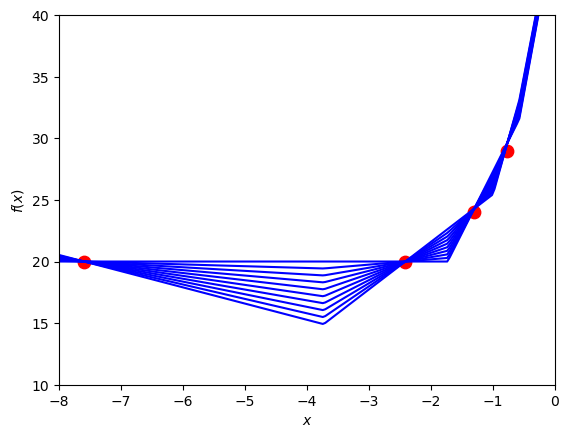

In [2]:
t = np.linspace(0, np.min([a/7.076, a/13.1623, a/7.0781]), 10)

import matplotlib.pyplot as plt


for i in range(5):
    y[i] = min_norm_interp(x[i], 0)

print(y)

xs = np.linspace(-8, 4, 300)
for ts in t: 
    plt.plot(xs, min_norm_interp(xs,ts), color = 'blue')

for i in range(5):
    plt.scatter(x[i], y[i], color = 'red', s = 80)


## Needed for enlarging
plt.xlim(-8, 0)
plt.ylim(10, 40)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")